In [1]:
from codecarbon import EmissionsTracker

# Set up the emissions tracker
tracker = EmissionsTracker()

[codecarbon INFO @ 20:47:34] [setup] RAM Tracking...
[codecarbon INFO @ 20:47:34] [setup] GPU Tracking...
[codecarbon INFO @ 20:47:34] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 20:47:34] [setup] CPU Tracking...
[codecarbon WARNING @ 20:47:34] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 20:47:35] We saw that you have a 12th Gen Intel(R) Core(TM) i7-12700H but we don't know it. Please contact us.
[codecarbon INFO @ 20:47:35] CPU Model on constant consumption mode: 12th Gen Intel(R) Core(TM) i7-12700H
[codecarbon INFO @ 20:47:35] >>> Tracker's metadata:
[codecarbon INFO @ 20:47:35]   Platform system: Windows-10-10.0.22000-SP0
[codecarbon INFO @ 20:47:35]   Python version: 3.8.5
[codecarbon INFO @ 20:47:35]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 20:47:35]   Available RAM : 15.692 GB
[codecarbon INFO @ 20:47:35]   CPU count: 20
[codecarbon INFO @ 20:47:35]   CPU model: 12th Gen Intel(R) Core(TM) i7-12700H
[codecarbon INFO @ 20:47:35] 

In [2]:
# Start tracking
tracker.start()

In [3]:
import pandas as pd

# Load the data from the provided CSV file
file_path = '../data/Water Level - Los Angeles - v2.csv'
los_angeles_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
los_angeles_data.head(), los_angeles_data.columns


(       Date Time (GMT)  Predicted (ft)  Verified (ft)
 0  1/1/2023       0:00           2.948           3.22
 1  1/1/2023       1:00           3.195           3.52
 2  1/1/2023       2:00           3.151           3.51
 3  1/1/2023       3:00           2.848           3.31
 4  1/1/2023       4:00           2.398           2.93,
 Index(['Date', 'Time (GMT)', 'Predicted (ft)', 'Verified (ft)'], dtype='object'))

In [4]:
# Convert 'Date' and 'Time (GMT)' to datetime and set as index
los_angeles_data['Datetime'] = pd.to_datetime(los_angeles_data['Date'] + ' ' + los_angeles_data['Time (GMT)'])
los_angeles_data.set_index('Datetime', inplace=True)

# Create lag features for 24 hours
for lag in range(1, 25):
    los_angeles_data[f'lag_{lag}_hour'] = los_angeles_data['Verified (ft)'].shift(lag)

# Remove rows with NaN values which will be the first 24 hours
los_angeles_data_clean = los_angeles_data.dropna()

# Preview the updated dataframe
los_angeles_data_clean.head()


,Date,Time (GMT),Predicted (ft),Verified (ft),lag_1_hour,lag_2_hour,lag_3_hour,lag_4_hour,lag_5_hour,lag_6_hour,...,lag_15_hour,lag_16_hour,lag_17_hour,lag_18_hour,lag_19_hour,lag_20_hour,lag_21_hour,lag_22_hour,lag_23_hour,lag_24_hour
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-01-02 00:00:00,1/2/2023,0:00,2.155,2.49,1.78,1.16,0.84,0.93,1.37,2.19,...,3.50,2.83,2.51,2.43,2.60,2.93,3.31,3.51,3.52,3.22
2023-01-02 01:00:00,1/2/2023,1:00,2.783,3.14,2.49,1.78,1.16,0.84,0.93,1.37,...,4.32,3.50,2.83,2.51,2.43,2.60,2.93,3.31,3.51,3.52
2023-01-02 02:00:00,1/2/2023,2:00,3.164,3.53,3.14,2.49,1.78,1.16,0.84,0.93,...,5.21,4.32,3.50,2.83,2.51,2.43,2.60,2.93,3.31,3.51
2023-01-02 03:00:00,1/2/2023,3:00,3.234,3.53,3.53,3.14,2.49,1.78,1.16,0.84,...,5.71,5.21,4.32,3.50,2.83,2.51,2.43,2.60,2.93,3.31
2023-01-02 04:00:00,1/2/2023,4:00,3.024,3.30,3.53,3.53,3.14,2.49,1.78,1.16,...,6.07,5.71,5.21,4.32,3.50,2.83,2.51,2.43,2.60,2.93


In [5]:
# Load the future data provided by the user
future_data_path = '../data/future data - Los Angeles.csv'
future_data = pd.read_csv(future_data_path)

# Convert 'Date' and 'Time (GMT)' to datetime and set as index
future_data['Datetime'] = pd.to_datetime(future_data['Date'] + ' ' + future_data['Time (GMT)'])
future_data.set_index('Datetime', inplace=True)

# Create lag features for the future data
for lag in range(1, 25):
    future_data[f'lag_{lag}_hour'] = future_data['Verified (ft)'].shift(lag)

# Remove rows with NaN values
future_data_clean = future_data.dropna()

# Display the prepared future data
future_data_clean.head(), future_data_clean.columns


(Empty DataFrame
 Columns: [Date, Time (GMT), Predicted (ft), Verified (ft), lag_1_hour, lag_2_hour, lag_3_hour, lag_4_hour, lag_5_hour, lag_6_hour, lag_7_hour, lag_8_hour, lag_9_hour, lag_10_hour, lag_11_hour, lag_12_hour, lag_13_hour, lag_14_hour, lag_15_hour, lag_16_hour, lag_17_hour, lag_18_hour, lag_19_hour, lag_20_hour, lag_21_hour, lag_22_hour, lag_23_hour, lag_24_hour]
 Index: []
 
 [0 rows x 28 columns],
 Index(['Date', 'Time (GMT)', 'Predicted (ft)', 'Verified (ft)', 'lag_1_hour',
        'lag_2_hour', 'lag_3_hour', 'lag_4_hour', 'lag_5_hour', 'lag_6_hour',
        'lag_7_hour', 'lag_8_hour', 'lag_9_hour', 'lag_10_hour', 'lag_11_hour',
        'lag_12_hour', 'lag_13_hour', 'lag_14_hour', 'lag_15_hour',
        'lag_16_hour', 'lag_17_hour', 'lag_18_hour', 'lag_19_hour',
        'lag_20_hour', 'lag_21_hour', 'lag_22_hour', 'lag_23_hour',
        'lag_24_hour'],
       dtype='object'))

In [6]:
# Display the initial rows of the future data as uploaded
initial_future_data_display = future_data.head(10)
last_future_data_display = future_data.tail(10)

initial_future_data_display, last_future_data_display


(                         Date Time (GMT)  Predicted (ft)  Verified (ft)  \
 Datetime                                                                  
 2024-04-01 00:00:00  4/1/2024       0:00           2.571           2.93   
 2024-04-01 01:00:00  4/1/2024       1:00           2.670           3.00   
 2024-04-01 02:00:00  4/1/2024       2:00           2.813           3.16   
 2024-04-01 03:00:00  4/1/2024       3:00           3.035           3.45   
 2024-04-01 04:00:00  4/1/2024       4:00           3.344           3.72   
 2024-04-01 05:00:00  4/1/2024       5:00           3.715           4.02   
 2024-04-01 06:00:00  4/1/2024       6:00           4.096           4.46   
 2024-04-01 07:00:00  4/1/2024       7:00           4.419           4.81   
 2024-04-01 08:00:00  4/1/2024       8:00           4.612           4.98   
 2024-04-01 09:00:00  4/1/2024       9:00           4.619           4.97   
 
                      lag_1_hour  lag_2_hour  lag_3_hour  lag_4_hour  \
 Datetime     

In [7]:
# Extract the last 24 hours from the historical data to prepend to the future data for complete lag features
last_24_hours = los_angeles_data_clean.tail(24)

# Concatenate the last 24 hours of historical data with the future data
combined_future_data = pd.concat([last_24_hours, future_data])

# Recreate the lag features to ensure they are correctly computed
for lag in range(1, 25):
    combined_future_data[f'lag_{lag}_hour'] = combined_future_data['Verified (ft)'].shift(lag)

# Now select only the rows for April 1, 2024, that should have complete lag features
final_future_data = combined_future_data[combined_future_data.index >= '2024-04-01'].dropna()

# Display the final prepared data for April 1, 2024
final_future_data.head(), final_future_data.columns


(                         Date Time (GMT)  Predicted (ft)  Verified (ft)  \
 Datetime                                                                  
 2024-04-01 00:00:00  4/1/2024       0:00           2.571           2.93   
 2024-04-01 01:00:00  4/1/2024       1:00           2.670           3.00   
 2024-04-01 02:00:00  4/1/2024       2:00           2.813           3.16   
 2024-04-01 03:00:00  4/1/2024       3:00           3.035           3.45   
 2024-04-01 04:00:00  4/1/2024       4:00           3.344           3.72   
 
                      lag_1_hour  lag_2_hour  lag_3_hour  lag_4_hour  \
 Datetime                                                              
 2024-04-01 00:00:00        2.88        2.81        2.53        2.19   
 2024-04-01 01:00:00        2.93        2.88        2.81        2.53   
 2024-04-01 02:00:00        3.00        2.93        2.88        2.81   
 2024-04-01 03:00:00        3.16        3.00        2.93        2.88   
 2024-04-01 04:00:00        3.45  

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Since we want to predict for April 1, 2024, we will use data until March 31, 2024, for training
train_data = los_angeles_data_clean[los_angeles_data_clean.index < '2024-04-01']

# Features and target variable
X_train = train_data[[f'lag_{i}_hour' for i in range(1, 25)]]
y_train = train_data['Verified (ft)']

# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


[codecarbon INFO @ 20:47:53] Energy consumed for RAM : 0.000025 kWh. RAM Power : 5.884547710418702 W
[codecarbon INFO @ 20:47:53] Energy consumed for all GPUs : 0.000075 kWh. Total GPU Power : 17.986345822306827 W
[codecarbon INFO @ 20:47:53] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:47:53] 0.000277 kWh of electricity used since the beginning.


RandomForestRegressor(random_state=42)

In [9]:
# Train Gradient Boosting Machine Regressor
gbm_model = GradientBoostingRegressor(random_state=42)
gbm_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [10]:
# Selecting features for the prediction
X_future = final_future_data[[f'lag_{i}_hour' for i in range(1, 25)]]

# Making predictions using both models
predictions_rf = rf_model.predict(X_future)
predictions_gbm = gbm_model.predict(X_future)

# Combining predictions with the actual times for display
predictions_results = final_future_data[['Date', 'Time (GMT)', 'Predicted (ft)', 'Verified (ft)']].copy()
predictions_results['RF Predictions (ft)'] = predictions_rf
predictions_results['GBM Predictions (ft)'] = predictions_gbm

predictions_results


,Date,Time (GMT),Predicted (ft),Verified (ft),RF Predictions (ft),GBM Predictions (ft)
Datetime,,,,,,
2024-04-01 00:00:00,4/1/2024,0:00,2.571,2.93,2.9621,3.048523
2024-04-01 01:00:00,4/1/2024,1:00,2.670,3.00,2.9266,2.957324
2024-04-01 02:00:00,4/1/2024,2:00,2.813,3.16,3.0457,3.020956
2024-04-01 03:00:00,4/1/2024,3:00,3.035,3.45,3.1990,3.191871
2024-04-01 04:00:00,4/1/2024,4:00,3.344,3.72,3.6105,3.634661
2024-04-01 05:00:00,4/1/2024,5:00,3.715,4.02,4.0274,4.153442
2024-04-01 06:00:00,4/1/2024,6:00,4.096,4.46,4.3947,4.474984
2024-04-01 07:00:00,4/1/2024,7:00,4.419,4.81,4.7948,4.802799
2024-04-01 08:00:00,4/1/2024,8:00,4.612,4.98,5.0774,4.915484


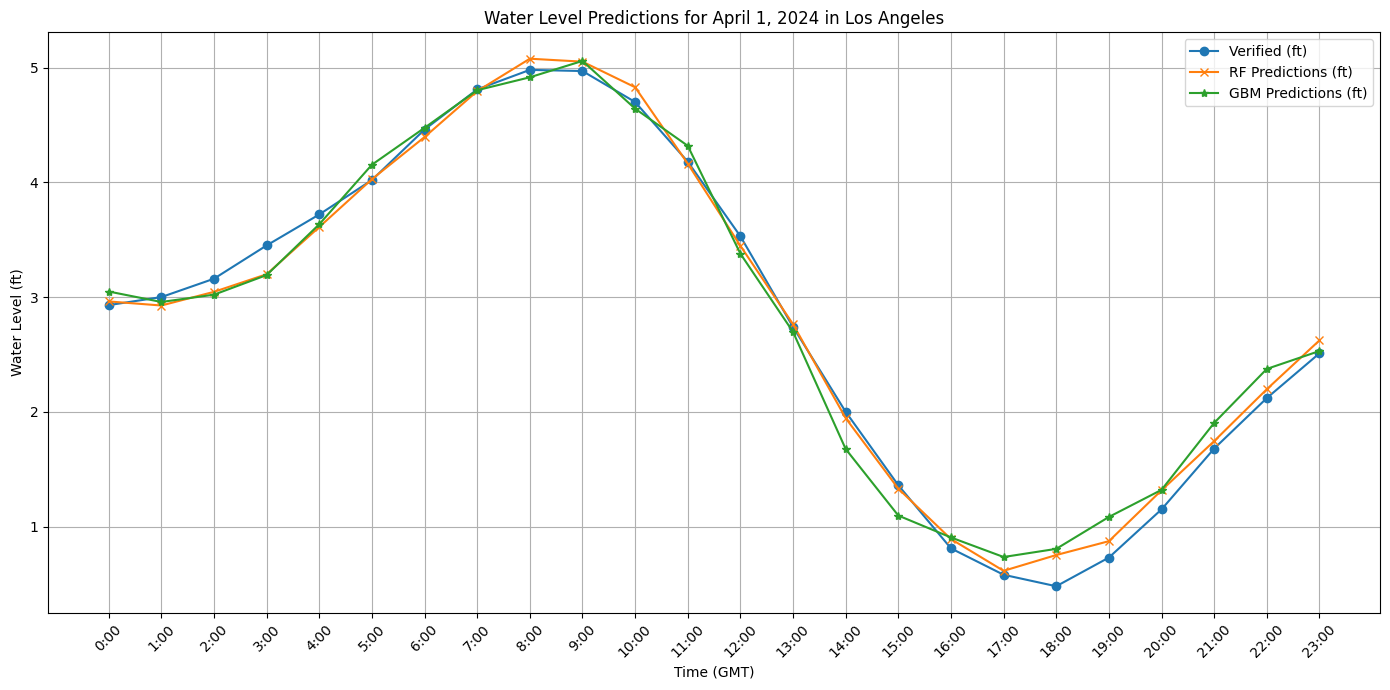

In [11]:
import matplotlib.pyplot as plt

# Plotting the predictions and actual values
plt.figure(figsize=(14, 7))
plt.plot(predictions_results['Time (GMT)'], predictions_results['Verified (ft)'], label='Verified (ft)', marker='o')
plt.plot(predictions_results['Time (GMT)'], predictions_results['RF Predictions (ft)'], label='RF Predictions (ft)', marker='x')
plt.plot(predictions_results['Time (GMT)'], predictions_results['GBM Predictions (ft)'], label='GBM Predictions (ft)', marker='*')

plt.title('Water Level Predictions for April 1, 2024 in Los Angeles')
plt.xlabel('Time (GMT)')
plt.ylabel('Water Level (ft)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Actual verified levels
y_true = predictions_results['Verified (ft)'].values

# RF model predictions
rf_predictions = predictions_results['RF Predictions (ft)'].values

# GBM model predictions
gbm_predictions = predictions_results['GBM Predictions (ft)'].values

# Calculate MSE, MAE, RMSE, R2 for RF
mse_rf = mean_squared_error(y_true, rf_predictions)
mae_rf = mean_absolute_error(y_true, rf_predictions)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_true, rf_predictions)

# Calculate MSE, MAE, RMSE, R2 for GBM
mse_gbm = mean_squared_error(y_true, gbm_predictions)
mae_gbm = mean_absolute_error(y_true, gbm_predictions)
rmse_gbm = np.sqrt(mse_gbm)
r2_gbm = r2_score(y_true, gbm_predictions)

(mse_rf, mae_rf, rmse_rf, r2_rf), (mse_gbm, mae_gbm, rmse_gbm, r2_gbm)


((0.012343231250000001,
  0.08902083333333306,
  0.1111000956345223,
  0.9941928965603596),
 (0.03207444441562111,
  0.14705891899073772,
  0.17909339579007683,
  0.9849099791847041))

**Random Forest (RF) Model:**
- Mean Squared Error (MSE): 0.012
- Mean Absolute Error (MAE): 0.089
- Root Mean Squared Error (RMSE): 0.111
- R-squared (R²): 0.994

**Gradient Boosting Machine (GBM) Model:**
- Mean Squared Error (MSE): 0.032
- Mean Absolute Error (MAE): 0.147
- Root Mean Squared Error (RMSE): 0.179
- R-squared (R²): 0.985

In [13]:
# Stop tracking and get emissions data
emissions = tracker.stop()
print(f"Estimated CO2 emissions for the computation: {emissions} kg")

[codecarbon INFO @ 20:48:02] Energy consumed for RAM : 0.000038 kWh. RAM Power : 5.884547710418702 W
[codecarbon INFO @ 20:48:02] Energy consumed for all GPUs : 0.000117 kWh. Total GPU Power : 18.398988378497723 W
[codecarbon INFO @ 20:48:02] Energy consumed for all CPUs : 0.000274 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:48:02] 0.000429 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:48:02] graceful shutdown. Exceptions:
[codecarbon WARNING @ 20:48:02] <class 'Exception'>
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\codecarbon\core\util.py", line 23, in suppress
    yield
  File "D:\Anaconda3\lib\contextlib.py", line 75, in inner
    return func(*args, **kwds)
  File "D:\Anaconda3\lib\site-packages\codecarbon\emissions_tracker.py", line 546, in stop
    self._persist_data(emissions_data, experiment_name=self._experiment_name)
  File "D:\Anaconda3\lib\site-packages\codecarbon\emissions_tracker.py", line 557, in _persist_data

Estimated CO2 emissions for the computation: None kg
